Version 3: Dollar Cost Averaging

---

- Investment Strategy: dollar-cost-averaging, or buying into the market on a regular basis, regardless of fluctuations.<br>
- Methodology: Simulate a dollar-cost-average strategy by investing $25 each Tuesday.  I decided on Tuesday to avoid the markets being closed on some Monday holidays.  I am also assuming the daily average daily price as the purchase price.<br>
- Follow-up Question:  After getting started with this strategy, is there ever a time when my invested dollars are greater than the value of my investments?  In other words:  are there periods of time where I am siting on a loss?  See graph for information.

In [28]:
#Loading libraries

import yfinance as yf 
import pandas as pd
import openpyxl
import datetime as dt
import matplotlib.pyplot as plt

# AI description of the libraries
# `yfinance`: This is a popular open-source library that allows you to access the financial data available on Yahoo Finance. You can download historical market data, get real-time data, and more.
# `pandas`: This is a powerful data manipulation library in Python. It provides data structures and functions needed to manipulate structured data, including functions for reading and writing data in a variety of formats.
# `openpyxl`: This is a Python library for reading and writing Excel 2010 xlsx/xlsm/xltx/xltm files. It is used when you want to work with Excel files (.xlsx, .xlsm) in Python.
# `datetime`: This is a module in Python's standard library for working with dates and times. It provides classes for manipulating dates and times in both simple and complex ways.

I am using two low cost ETFs for this analysis.<br>
- SPLG is a low cost ETF that tracks the S&P 500 index.
- XLG is a low cost, ETF that tracks the 50 largest companies in the S&P 500 index.
- QQQ is an ETF that tracks the NASDAQ 100.  (QQQM is a lower cost ETF but does not have 10 years of history).

Methodology:<br>
1. Download 10 years of SPLG data.<br>
2. Implement the methodology.<br>
3. Check the results.<br>

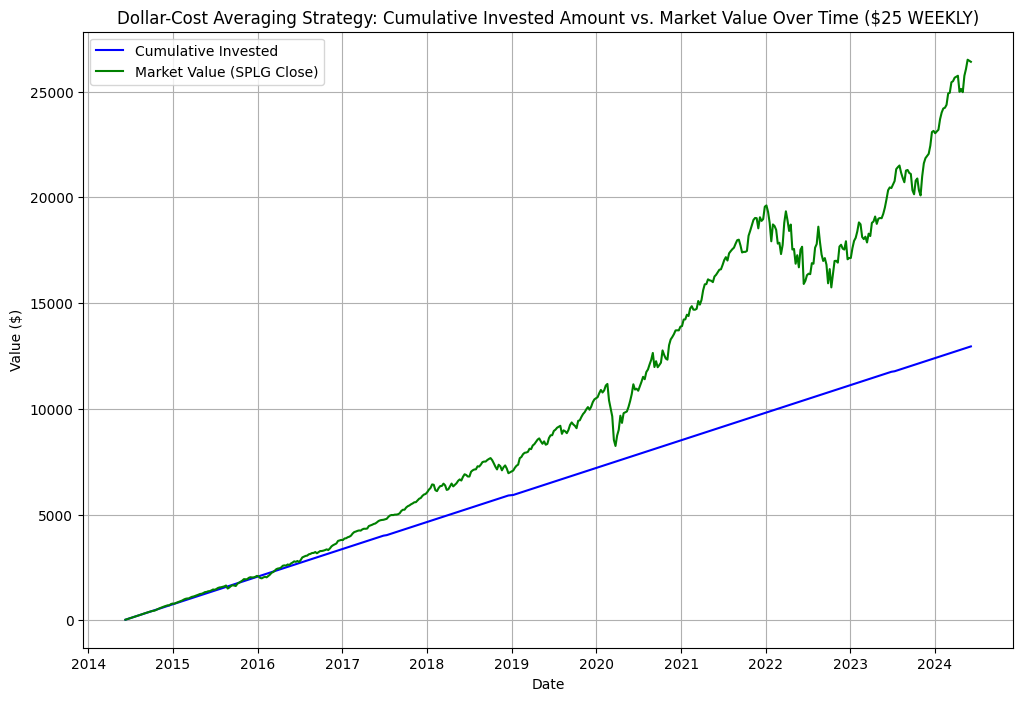

,Date,Symbol,Open,High,Low,Close,Capital Gains,Day of Week,Avg Price,Shares Purchased,Cumulative Shares,Market Value,Cumulative Invested
2495,2024-05-07 04:00:00,SPLG,60.869999,61.000000,60.740002,60.840000,0.0,Tuesday,60.855000,0.410813,423.252912,25750.707260,12850
2500,2024-05-14 04:00:00,SPLG,61.279999,61.610001,61.230000,61.549999,0.0,Tuesday,61.414999,0.407067,423.659979,26076.271394,12875
2505,2024-05-21 04:00:00,SPLG,62.250000,62.520000,62.230000,62.509998,0.0,Tuesday,62.379999,0.400769,424.060749,26508.036686,12900
2509,2024-05-28 04:00:00,SPLG,62.389999,62.400002,62.000000,62.330002,0.0,Tuesday,62.360001,0.400898,424.461647,26456.695213,12925
2514,2024-06-04 04:00:00,SPLG,61.939999,62.240002,61.740002,62.160000,0.0,Tuesday,62.049999,0.402901,424.864548,26409.580210,12950


In [29]:
# Download 10 years of SPLG stock data
ticker = yf.Ticker("SPLG")
data = ticker.history(period="10y", interval="1d")
df = pd.DataFrame(data)
df.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
df.insert(0, 'Date_add', df.index)
df.insert(1, 'Symbol', 'SPLG')
df.to_csv('yf_splg.csv', index=False)


# Load historical data
df = pd.read_csv('yf_splg.csv', parse_dates=['Date_add'])
df.rename(columns={'Date_add': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)

# Filter for Tuesdays
df['Day of Week'] = df['Date'].dt.day_name()
tuesdays_df = df[df['Day of Week'] == 'Tuesday'].copy()

# Calculate daily average price
tuesdays_df.loc[:, 'Avg Price'] = (tuesdays_df['Open'] + tuesdays_df['Close']) / 2

# Simulate DCA purchases
investment_amount = 25
tuesdays_df.loc[:, 'Shares Purchased'] = investment_amount / tuesdays_df['Avg Price']
tuesdays_df.loc[:, 'Cumulative Shares'] = tuesdays_df['Shares Purchased'].cumsum()

# Calculate the market value of the cumulative shares
tuesdays_df.loc[:, 'Market Value'] = tuesdays_df['Cumulative Shares'] * tuesdays_df['Close']

# Calculate the cumulative invested amount (correcting the calculation)
tuesdays_df.loc[:, 'Cumulative Invested'] = investment_amount * (tuesdays_df.reset_index().index + 1)

# Add debugging information
#print(tuesdays_df[['Date', 'Avg Price', 'Shares Purchased', 'Cumulative Shares', 'Market Value', 'Cumulative Invested']].head(10))

# Plot the DCA strategy results
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(tuesdays_df['Date'], tuesdays_df['Cumulative Invested'], label='Cumulative Invested', color='blue')
ax.plot(tuesdays_df['Date'], tuesdays_df['Market Value'], label='Market Value (SPLG Close)', color='green')
ax.set_title('Dollar-Cost Averaging Strategy: Cumulative Invested Amount vs. Market Value Over Time ($25 WEEKLY)')
ax.set_xlabel('Date')
ax.set_ylabel('Value ($)')
ax.legend()
ax.grid(True)

plt.show()

# Display the final few rows of the DataFrame for inspection
tuesdays_df.tail()


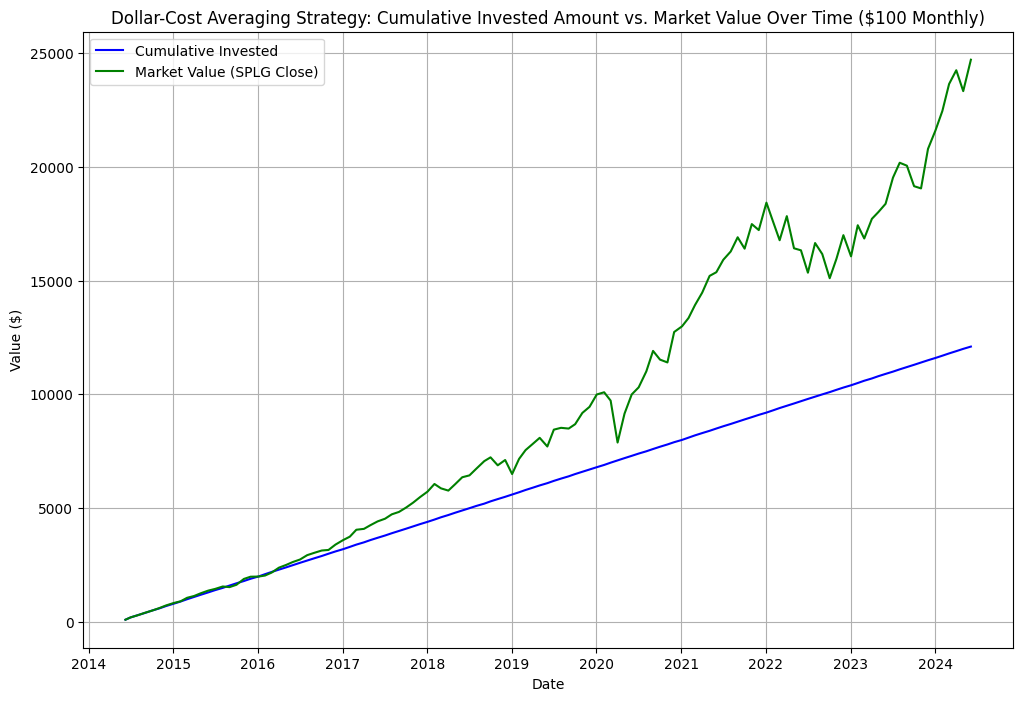

,Year,Month,Date,Symbol,Open,High,Low,Close,Capital Gains,Avg Price,Shares Purchased,Cumulative Shares,Market Value,Cumulative Invested
116,2024,2,2024-02-01 05:00:00,SPLG,56.808544,57.366665,56.718847,57.366665,0.0,57.087605,1.751694,391.386286,22452.525924,11700
117,2024,3,2024-03-01 05:00:00,SPLG,59.678875,60.177196,59.629044,60.137329,0.0,59.908102,1.669223,393.055510,23637.308533,11800
118,2024,4,2024-04-01 04:00:00,SPLG,61.619999,61.680000,61.270000,61.419998,0.0,61.519999,1.625488,394.680997,24241.306127,11900
119,2024,5,2024-05-01 04:00:00,SPLG,58.980000,59.770000,58.799999,58.840000,0.0,58.910000,1.697505,396.378502,23322.911112,12000
120,2024,6,2024-06-03 04:00:00,SPLG,62.230000,62.240002,61.480000,62.070000,0.0,62.150000,1.609010,397.987512,24703.084771,12100


In [30]:
# Load historical data
df = pd.read_csv('yf_splg.csv', parse_dates=['Date_add'])
df.rename(columns={'Date_add': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)

# Filter for the first trading day of each month
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
first_days_df = df.groupby(['Year', 'Month']).first().reset_index()

# Calculate daily average price
first_days_df.loc[:, 'Avg Price'] = (first_days_df['Open'] + first_days_df['Close']) / 2

# Simulate DCA purchases
investment_amount = 100
first_days_df.loc[:, 'Shares Purchased'] = investment_amount / first_days_df['Avg Price']
first_days_df.loc[:, 'Cumulative Shares'] = first_days_df['Shares Purchased'].cumsum()

# Calculate the market value of the cumulative shares
first_days_df.loc[:, 'Market Value'] = first_days_df['Cumulative Shares'] * first_days_df['Close']

# Calculate the cumulative invested amount
first_days_df.loc[:, 'Cumulative Invested'] = investment_amount * (first_days_df.reset_index().index + 1)

# Add debugging information
#print(first_days_df[['Date', 'Avg Price', 'Shares Purchased', 'Cumulative Shares', 'Market Value', 'Cumulative Invested']].head(10))

# Plot the DCA strategy results
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(first_days_df['Date'], first_days_df['Cumulative Invested'], label='Cumulative Invested', color='blue')
ax.plot(first_days_df['Date'], first_days_df['Market Value'], label='Market Value (SPLG Close)', color='green')
ax.set_title('Dollar-Cost Averaging Strategy: Cumulative Invested Amount vs. Market Value Over Time ($100 Monthly)')
ax.set_xlabel('Date')
ax.set_ylabel('Value ($)')
ax.legend()
ax.grid(True)

plt.show()

# Display the final few rows of the DataFrame for inspection
first_days_df.tail()


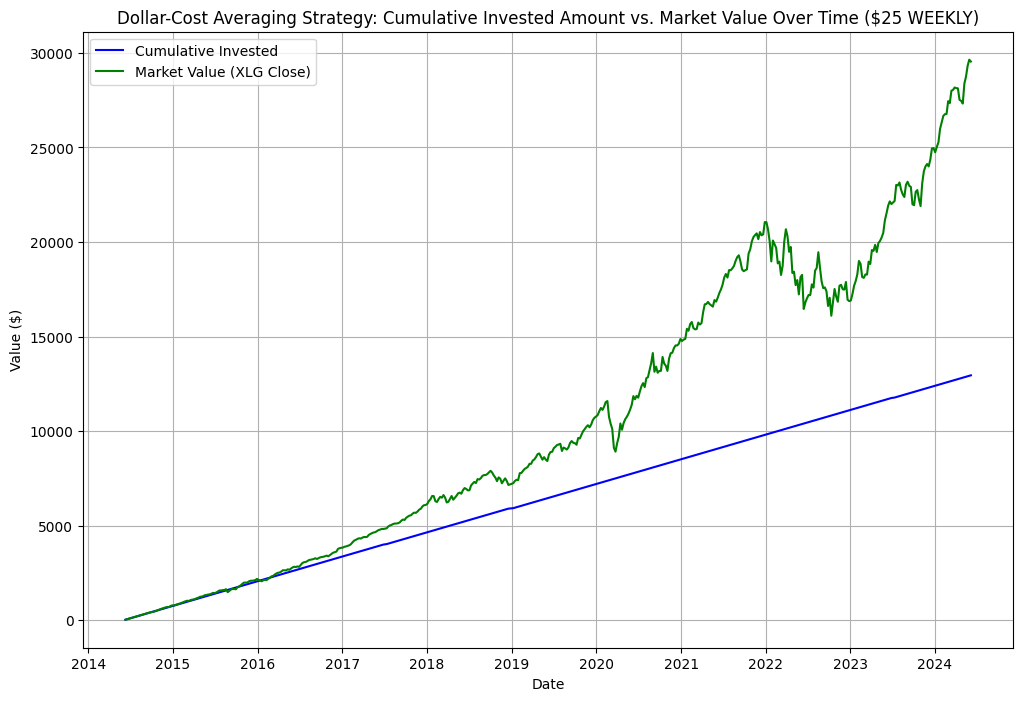

,Date,Symbol,Open,High,Low,Close,Capital Gains,Day of Week,Avg Price,Shares Purchased,Cumulative Shares,Market Value,Cumulative Invested
2495,2024-05-07 04:00:00,XLG,42.139999,42.230000,42.009998,42.099998,0.0,Tuesday,42.119999,0.593542,674.225279,28384.883214,12850
2500,2024-05-14 04:00:00,XLG,42.310001,42.639999,42.270000,42.599998,0.0,Tuesday,42.455000,0.588859,674.814138,28747.081237,12875
2505,2024-05-21 04:00:00,XLG,43.169998,43.419998,43.130001,43.410000,0.0,Tuesday,43.289999,0.577501,675.391638,29318.750916,12900
2509,2024-05-28 04:00:00,XLG,43.680000,43.849998,43.520000,43.849998,0.0,Tuesday,43.764999,0.571233,675.962871,29640.970864,12925
2514,2024-06-04 04:00:00,XLG,43.480000,43.720001,43.360001,43.669998,0.0,Tuesday,43.574999,0.573723,676.536595,29544.351844,12950


In [31]:
# Download 10 years of XLG stock data
ticker = yf.Ticker("XLG")
data = ticker.history(period="10y", interval="1d")
df = pd.DataFrame(data)
df.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
df.insert(0, 'Date_add', df.index)
df.insert(1, 'Symbol', 'XLG')
df.to_csv('yf_xlg.csv', index=False)


# Load historical data
df = pd.read_csv('yf_xlg.csv', parse_dates=['Date_add'])
df.rename(columns={'Date_add': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)

# Filter for Tuesdays
df['Day of Week'] = df['Date'].dt.day_name()
tuesdays_df = df[df['Day of Week'] == 'Tuesday'].copy()

# Calculate daily average price
tuesdays_df.loc[:, 'Avg Price'] = (tuesdays_df['Open'] + tuesdays_df['Close']) / 2

# Simulate DCA purchases
investment_amount = 25
tuesdays_df.loc[:, 'Shares Purchased'] = investment_amount / tuesdays_df['Avg Price']
tuesdays_df.loc[:, 'Cumulative Shares'] = tuesdays_df['Shares Purchased'].cumsum()

# Calculate the market value of the cumulative shares
tuesdays_df.loc[:, 'Market Value'] = tuesdays_df['Cumulative Shares'] * tuesdays_df['Close']

# Calculate the cumulative invested amount (correcting the calculation)
tuesdays_df.loc[:, 'Cumulative Invested'] = investment_amount * (tuesdays_df.reset_index().index + 1)

# Add debugging information
#print(tuesdays_df[['Date', 'Avg Price', 'Shares Purchased', 'Cumulative Shares', 'Market Value', 'Cumulative Invested']].head(10))

# Plot the DCA strategy results
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(tuesdays_df['Date'], tuesdays_df['Cumulative Invested'], label='Cumulative Invested', color='blue')
ax.plot(tuesdays_df['Date'], tuesdays_df['Market Value'], label='Market Value (XLG Close)', color='green')
ax.set_title('Dollar-Cost Averaging Strategy: Cumulative Invested Amount vs. Market Value Over Time ($25 WEEKLY)')
ax.set_xlabel('Date')
ax.set_ylabel('Value ($)')
ax.legend()
ax.grid(True)

plt.show()

# Display the final few rows of the DataFrame for inspection
tuesdays_df.tail()


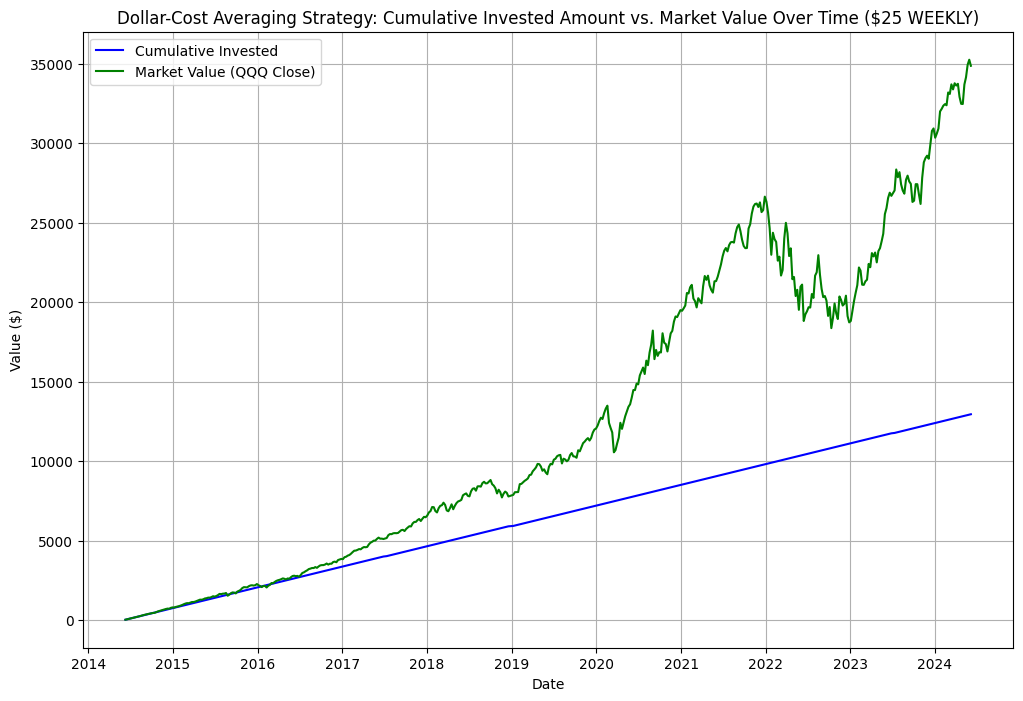

,Date,Symbol,Open,High,Low,Close,Capital Gains,Day of Week,Avg Price,Shares Purchased,Cumulative Shares,Market Value,Cumulative Invested
2470,2024-04-02 04:00:00,XLG,440.079987,441.429993,438.029999,441.109985,0.0,Tuesday,440.594986,0.056741,76.231347,33626.408495,12725
2475,2024-04-09 04:00:00,XLG,442.959991,443.239990,437.440002,442.230011,0.0,Tuesday,442.595001,0.056485,76.287832,33736.768942,12750
2480,2024-04-16 04:00:00,XLG,430.899994,433.760010,429.700012,431.100006,0.0,Tuesday,431.000000,0.058005,76.345837,32912.690796,12775
2485,2024-04-23 04:00:00,XLG,420.769989,426.279999,418.869995,425.070007,0.0,Tuesday,422.919998,0.059113,76.404950,32477.452585,12800
2490,2024-04-30 04:00:00,XLG,431.149994,432.559998,424.510010,424.589996,0.0,Tuesday,427.869995,0.058429,76.463379,32465.585723,12825
2495,2024-05-07 04:00:00,XLG,440.700012,441.970001,439.579987,440.320007,0.0,Tuesday,440.510010,0.056752,76.520131,33693.344728,12850
2500,2024-05-14 04:00:00,XLG,442.649994,446.470001,442.459991,445.929993,0.0,Tuesday,444.289993,0.056270,76.576401,34147.713825,12875
2505,2024-05-21 04:00:00,XLG,453.040009,455.989990,452.839996,455.799988,0.0,Tuesday,454.419998,0.055015,76.631416,34928.598447,12900
2509,2024-05-28 04:00:00,XLG,459.179993,459.739990,456.690002,459.679993,0.0,Tuesday,459.429993,0.054415,76.685831,35250.942319,12925
2514,2024-06-04 04:00:00,XLG,452.869995,455.579987,451.130005,454.369995,0.0,Tuesday,453.619995,0.055112,76.740943,34868.782077,12950


In [32]:
# Download 10 years of QQQ stock data
ticker = yf.Ticker("QQQ")
data = ticker.history(period="10y", interval="1d")
df = pd.DataFrame(data)
df.drop(['Dividends', 'Stock Splits', 'Volume'], axis=1, inplace=True)
df.insert(0, 'Date_add', df.index)
df.insert(1, 'Symbol', 'XLG')
df.to_csv('yf_qqq.csv', index=False)


# Load historical data
df = pd.read_csv('yf_qqq.csv', parse_dates=['Date_add'])
df.rename(columns={'Date_add': 'Date'}, inplace=True)
df['Date'] = pd.to_datetime(df['Date'], utc=True).dt.tz_convert(None)

# Filter for Tuesdays
df['Day of Week'] = df['Date'].dt.day_name()
tuesdays_df = df[df['Day of Week'] == 'Tuesday'].copy()

# Calculate daily average price
tuesdays_df.loc[:, 'Avg Price'] = (tuesdays_df['Open'] + tuesdays_df['Close']) / 2

# Simulate DCA purchases
investment_amount = 25
tuesdays_df.loc[:, 'Shares Purchased'] = investment_amount / tuesdays_df['Avg Price']
tuesdays_df.loc[:, 'Cumulative Shares'] = tuesdays_df['Shares Purchased'].cumsum()

# Calculate the market value of the cumulative shares
tuesdays_df.loc[:, 'Market Value'] = tuesdays_df['Cumulative Shares'] * tuesdays_df['Close']

# Calculate the cumulative invested amount (correcting the calculation)
tuesdays_df.loc[:, 'Cumulative Invested'] = investment_amount * (tuesdays_df.reset_index().index + 1)

# Add debugging information
#print(tuesdays_df[['Date', 'Avg Price', 'Shares Purchased', 'Cumulative Shares', 'Market Value', 'Cumulative Invested']].head(10))

# Plot the DCA strategy results
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(tuesdays_df['Date'], tuesdays_df['Cumulative Invested'], label='Cumulative Invested', color='blue')
ax.plot(tuesdays_df['Date'], tuesdays_df['Market Value'], label='Market Value (QQQ Close)', color='green')
ax.set_title('Dollar-Cost Averaging Strategy: Cumulative Invested Amount vs. Market Value Over Time ($25 WEEKLY)')
ax.set_xlabel('Date')
ax.set_ylabel('Value ($)')
ax.legend()
ax.grid(True)

plt.show()

# Display the final few rows of the DataFrame for inspection
tuesdays_df.tail(10)
